---
# ML by Hand
---

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [41]:
data = pd.read_csv('./ex1data2.txt', 
                   header=None, 
                   names=['surface', 'num_bedrooms', 'price']
              )
data.head()

,surface,num_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
surface,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
num_bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


## Data Rescaling

In [42]:
data = (
    data.sub(data.mean())
    .div(data.std())
)

data.head()

,surface,num_bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [43]:
data.insert(
    loc=0,
    column='ones',
    value=1,
)

data.head()

,ones,surface,num_bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## Inputs

In [44]:
cols = data.shape[1]
X = data.iloc[:, :cols-1]
X.head()

,ones,surface,num_bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


Target

In [45]:
y = data.iloc[:, cols-1:]
y.head()

,price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


## Convert to matricies and initialize theta

In [46]:
X = np.matrix(X.values)
# y = np.matrix(y)

In [47]:
X

matrix([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
        [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
        [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
        [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
        [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
        [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
        [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
        [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
        [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
        [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
        [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
        [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
        [ 1.00000000e+00

In [48]:
y = np.matrix(y.values)
y

matrix([[ 0.47574687],
        [-0.08407444],
        [ 0.22862575],
        [-0.86702453],
        [ 1.59538948],
        [-0.32399786],
        [-0.20403615],
        [-1.13094828],
        [-1.02697347],
        [-0.78305133],
        [-0.80305294],
        [ 0.05268191],
        [-0.08328269],
        [ 2.87498104],
        [-0.64389575],
        [ 0.87561923],
        [-0.32399786],
        [-1.12374258],
        [ 1.27627534],
        [ 2.06803861],
        [-0.69987788],
        [-0.68308324],
        [-0.77985235],
        [-0.64389575],
        [ 1.86730269],
        [-0.72387022],
        [ 0.99238196],
        [ 1.02837047],
        [ 1.07635515],
        [-0.32399786],
        [ 0.0758745 ],
        [-1.363666  ],
        [-0.20403615],
        [ 1.91528737],
        [-0.43596212],
        [-0.72387022],
        [-0.88381916],
        [ 0.03668701],
        [ 1.66816625],
        [-0.42716493],
        [ 0.22462702],
        [-0.08407444],
        [-0.21123385],
        [-0

In [50]:
theta = np.matrix(np.full((1,cols-1), 0, dtype=int ))
theta

matrix([[0, 0, 0]])

## Cost Error Function J

In [51]:
def J(X, y, theta):
  z = np.power(((X * theta.T) - y), 2)
  return  np.sum(z) / (len(X) * 2)

## Gradient Descent

In [52]:
def gradient_descent(X, y, theta, alpha, iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters)

  for i in range(iters):
    error = (X * theta.T) - y

    for j in range(parameters):
      term = np.multiply(error, X[:, j])
      temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
    
    theta = temp
    cost[i] = J(X, y, theta)
  
  return theta, cost


In [55]:
alpha = .1
iters = 100
g, cost = gradient_descent(X, y, theta, alpha, iters)

print(f'g = {g }')
print(f'cost = {cost[:5]}')
print(f'compute cost: {J(X,y, g)}')

g = [[-1.12557717e-16  8.79020847e-01 -4.74337322e-02]]
cost = [0.40693147 0.34617152 0.30110291 0.26742183 0.24202804]
compute cost: 0.1307006953901485


Text(0.5, 1.0, 'Error vs training epoch')

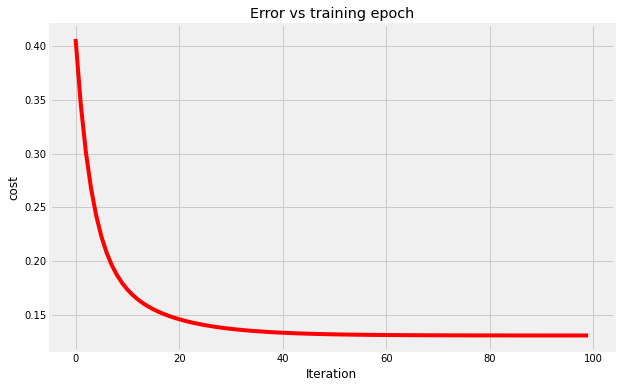

In [56]:
ig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('cost')
ax.set_title('Error vs training epoch')